# Naive Bayes Algorithm --IRIS DARASET--GUSSIAN NAIVE BAYES
---
## Notebook prepared by Muhammad Anas

## Definition
Naive Bayes is a supervised machine learning classification algorithm based on Bayes’ Theorem.

## Types of Naive Bayes
1. Gaussian Naive Bayes  
2. Multinomial Naive Bayes  
3. Bernoulli Naive Bayes

### 1️⃣ Gaussian Naive Bayes
- Used when features are **continuous (numerical)**
- Assumes data follows a **normal (Gaussian) distribution**
- Commonly used for datasets like **Iris**

✅ Example:
- Sepal length  
- Petal width 

In [7]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
#load the dataset
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


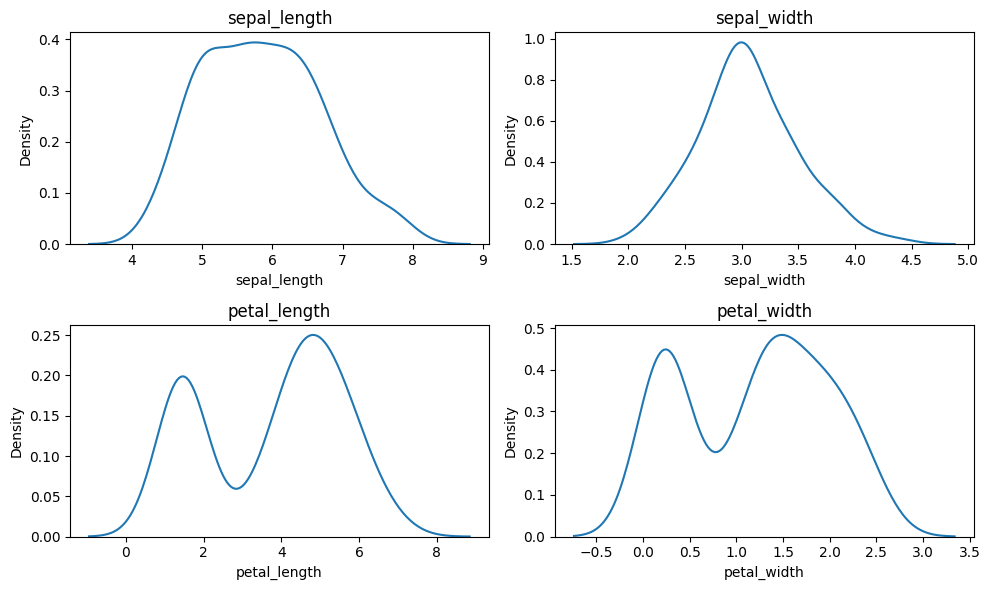

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("iris")

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i, col in enumerate(features):
    row = i // 2
    col_idx = i % 2
    sns.kdeplot(data=data, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()


#### The data seems like a normal distribution so we will apply Gaussian Naive Bayes

In [10]:
#split the dataset into features and target variable
X = data.drop('species', axis=1)
y = data['species']

In [11]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
#create the Gaussian Naive Bayes model
model = GaussianNB()
#train the model
model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [13]:
#make predictions
y_pred = model.predict(X_test)

In [14]:
#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



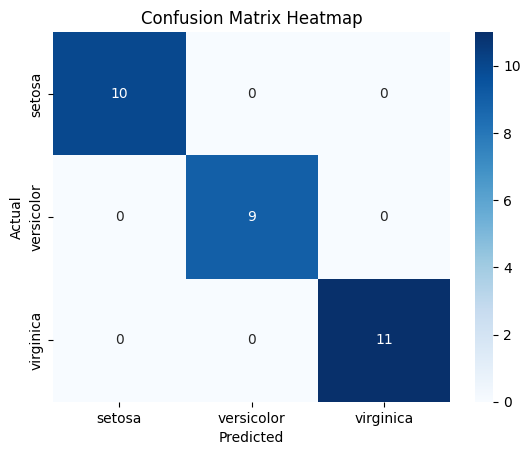

In [15]:
#draw the confusion matrix heatmap
print(class_report)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()